In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("/content/brest cancer dataset.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Dropping the id column
df = df.drop(columns='id', axis = 1)

In [5]:
# Dropping the unnamed column
df = df.drop(columns='Unnamed: 32', axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Mapping the diagnosis values M and B as 1 and 0 respectivly
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [7]:
# Grouping all the data by the type of mean, standard error and worst features
mean_features = list(df.columns[1:11])
se_features = list(df.columns[11:21])
worst_features = list(df.columns[21:31])

In [8]:
# Appending diagnosis to do them such that a correlation can be calculated.
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

In [9]:
# Creating a correlation matrix for our grouped data
corr = df[mean_features].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [10]:
corr = df[se_features].corr()
corr

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [11]:
corr = df[worst_features].corr()
corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [12]:
prediction_vars = ['radius_mean', 'perimeter_mean','area_mean','compactness_mean','concavity_mean',
                  'concave points_mean','radius_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst']

In [13]:
#Spliting the dataset into train and test
train, test = train_test_split(df, test_size = 0.15, random_state=1)

In [14]:
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

In [15]:
#KNN
#Initializing a KNN Model
modelKNN = KNeighborsClassifier()


In [16]:
#Fitting the data into the model
modelKNN.fit(train_x, train_y)

KNeighborsClassifier()

In [17]:
#Predicting y value using the test x data
predictionsKNN = modelKNN.predict(test_x)

In [18]:
#initalizing a confusion matrix
matrixKNN = confusion_matrix(test_y, predictionsKNN, labels=[0,1])

In [19]:
#Calculating the precision, recall and accuracy

precision_KNN = precision_score(test_y, predictionsKNN)
recall_KNN = recall_score(test_y, predictionsKNN)
accuracy_KNN = accuracy_score(test_y, predictionsKNN)

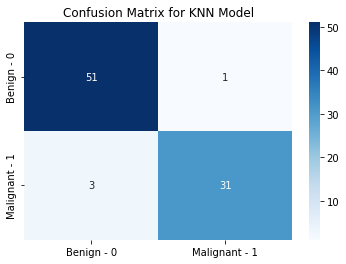

In [21]:
# Plot non-normalized confusion matrix for KNN model
cat = ['Benign - 0', 'Malignant - 1']
ax = plt.axes()
ax.set_title('Confusion Matrix for KNN Model')
sns.heatmap(matrixKNN,  annot=True, xticklabels= cat ,yticklabels= cat,  cmap='Blues', ax = ax)